# Linear programming example-1 with PuLP library

In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Python script to solve Linear Programming problems, using Pulp library.

Problem statement: (src - http://fisher.osu.edu/~croxton.4/tutorial/)

ChemCo produces two fertilizers, FastGro and ReallyFastGro. Each is made of a mix of two growth agents. FastGro is a 50/50 mix of the two, and it sells for \$13 per pound. ReallyFastGro is a 25/75 mix (i.e., its 25\% Agent 1 and 75\% Agent 2), and sells for \$15/pound. Agent 1 costs \$2/pound and Agent 2 costs \$3/pound. ChemCo can purchase up to 250 pounds of Agent 1 and up to 350 pounds of Agent 2 each day. What is ChemCo's optimal production strategy? i.e., How much of each product should it produce in order to maximize its profits?

In [142]:
import pulp as p

What is the objective?
- To maximise profits, how much of each products (pounds per day) should be produced

so variables are products here,
FG - volume of FastGro per day (pounds/ day)
RFG - volume of ReallyFastGro per day (pounds / day)

Objective function
Total Revenue = 13FG + 15RFG

Total cost = 
- Agent 1 = 2(0.5FG + 0.25RFG)
- Agent 2 = 3(0.5FG + 0.75RFG)

So total profit = 
13FG + 15RFG - 2(0.5FG + 0.25RFG) - 3(0.5FG + 0.75RFG)
= 10.5FG + 12.25RFG

In [143]:
# declare all variables
X = p.LpVariable("X", 0)  # FG >= 0
Y = p.LpVariable("Y", 0)  # RFG >= 0

In [144]:
# Define the problem
# Objective is to maximize profit
prob = p.LpProblem("problem", p.LpMaximize)

In [145]:
# Define constraints
prob += 0.5*X + 0.25*Y <= 250
prob += 0.5*X + 0.75*Y <= 350
prob += X >= 0
prob += Y >= 0

In [146]:
# Define objective function
prob += 10.5*X + 12.25*Y

Let's print out the problem to make sure we have everything

In [147]:
prob

problem:
MAXIMIZE
10.5*X + 12.25*Y + 0.0
SUBJECT TO
_C1: 0.5 X + 0.25 Y <= 250

_C2: 0.5 X + 0.75 Y <= 350

_C3: X >= 0

_C4: Y >= 0

VARIABLES
X Continuous
Y Continuous

In [148]:
# Solve the problem
status = prob.solve()

In [149]:
p.LpStatus[status]

'Optimal'

In [150]:
p.value(X), p.value(Y)

(400.0, 200.0)

## Let's visualise the problem..

Lets rewrite the linear constraints to plot that in a graph

Equation 1:
0.5*X + 0.25*Y <= 250
 = 0.5*X <= 250 - 0.25*Y
 = X <= 500 - 0.5*Y

Equation 2:
0.5*X + 0.75*Y <= 350 
= 0.5*X <= 350 - 0.75*Y 
= X <= 700 - 1.5*Y

In [151]:
%pylab inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np

Populating the interactive namespace from numpy and matplotlib


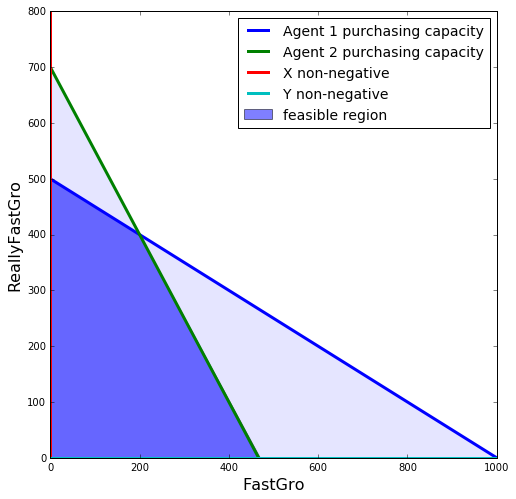

In [152]:
# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
Y = np.linspace(0, 1000)

# Add purchasing constraint for Agent 1 - X <= 500 - 0.5*Y
plt.plot(Y, 500 - 0.5*Y, lw=3, label='Agent 1 purchasing capacity')
plt.fill_between(Y, 0, 500 - 0.5*Y, alpha=0.1)

# Add purchasing constraint for Agent 2 - X <= 700 - 1.5*Y
plt.plot(Y, 700 - 1.5*Y, lw=3, label='Agent 2 purchasing capacity')
plt.fill_between(Y, 0, 700 - 1.5*Y, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(Y), Y, lw=3, label="X non-negative")
plt.plot(Y, np.zeros_like(Y), lw=3, label="Y non-negative")

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 500.),
    (200., 400.),
    (470., 0.),
    (0., 0.),
])
patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel("FastGro", fontsize=16)
plt.ylabel("ReallyFastGro", fontsize=16)
plt.xlim(0, 1000)
plt.ylim(0, 800)
plt.legend(fontsize=14)
plt.show()

One possible complaint about this graphic is that it is a bit misleading. The solid feasible region seems to suggest a continuous area of possible choices for X and Y, but this is not the case. One last constraint is that the decision variables must be integers. Let's see if we can improve on the plot:

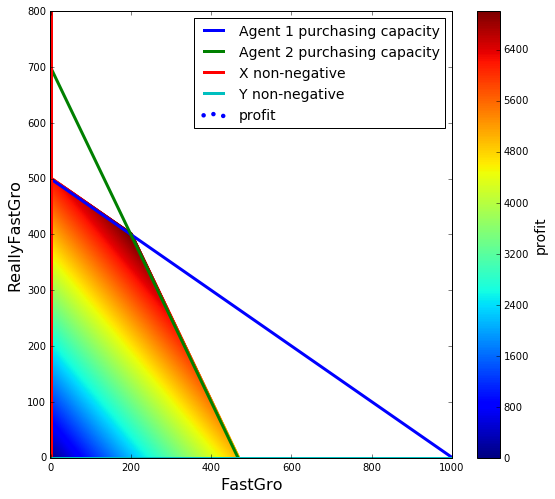

In [167]:
# create the plot object
fig, ax = plt.subplots(figsize=(9, 8))
Y = np.linspace(0, 1000)

# Add purchasing constraint for Agent 1 - X <= 500 - 0.5*Y
plt.plot(Y, 500 - 0.5*Y, lw=3, label='Agent 1 purchasing capacity')

# Add purchasing constraint for Agent 2 - X <= 700 - 1.5*Y
plt.plot(Y, 700 - 1.5*Y, lw=3, label='Agent 2 purchasing capacity')

# add non-negativity constraints
plt.plot(np.zeros_like(Y), Y, lw=3, label="X non-negative")
plt.plot(Y, np.zeros_like(Y), lw=3, label="Y non-negative")

# plot the possible (Y, X) pairs
pairs = [(Y, X) for Y in np.arange(1001)
                for X in np.arange(1001)
                if (0.5*X + 0.25*Y) <= 250  # Constraints
                and (0.5*X + 0.75*Y) <= 350 # Constraints
        ]

# split these into our variables
xs, ys = np.hsplit(np.array(pairs), 2)

# caculate the objective function at each pair
z = 10.5*xs + 12.25*ys  # the objective function

# plot the results
# c:color, cmap:Colormap, lw:linewidth
plt.scatter(xs, ys, c=z, cmap='jet', label='profit', zorder=2, lw=0)

# labels and stuff
cb = plt.colorbar()
cb.set_label('profit', fontsize=14)
plt.xlabel("FastGro", fontsize=16)
plt.ylabel("ReallyFastGro", fontsize=16)
plt.xlim(-0.5, 1000)
plt.ylim(-0.5, 800)
plt.legend(fontsize=14)
plt.show()